# Author: Arslan Haider Khan 

# TASK 4: Exploratory Data Analysis- Terrorism

# Problem Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

A: As a security/defense analyst, try to find out the hot zone of terrorism.

B: What all security issues and insights you can derive by EDA?

# Dataset : https://bit.ly/2TK5Xn5


# Loading datasets 

In [11]:
# import necessary libraries
import numpy as np               #for numerical computation
import pandas as pd              #for loading dataset
import matplotlib.pyplot as plt #for visualization
import seaborn as sns            #for visualization

In [13]:
df = pd.read_csv(r"C:\Users\laptop house\Desktop\TSF tasks\Task 4\globalterrorismdb_0718dist.csv",
                 encoding = 'latin1',
                low_memory = False)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Preprocessing the data 

In [14]:
#information on dataframe df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [15]:
#summary statistics of df
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


Renaming columns using .rename() function


In [16]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':
                  'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                  'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                   'targtype1_txt':'Target_Type','weaptype1_txt':'Weapon_type','motive':'Motive',
                  'extended':'Extended','latitude':'Latitude','longitude':'Longitude', 'target1': 'Target','city':'City'}, inplace = True)

In [17]:
df.head()

,eventid,Year,Month,Day,approxdate,Extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


Missing Values


In [18]:
#Number of missing values in the dataframe grouped by column names
df.isna().sum()



eventid            0
Year               0
Month              0
Day                0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [19]:
#total number of missing values or cells with missing values in the entire dataframe
missing_values = (df.isna().sum()).sum()
missing_values

13853997

In [20]:
#total cells in the dataframe
total_cells = df.size
total_cells

24528285

In [21]:
#%of missing values in our dataframe 'df'
(missing_values/total_cells)*100

56.481718962414206

As you can see more than half the values in the dataframe are missing!


In [22]:
# Rewriting the dataframe with only necessary columns
df = df[['Year','Month','Day','Country','State','Region','City','Latitude','Longitude',
                 'AttackType','Killed','Wounded','Group','Target_Type','Weapon_type']]
df.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Group,Target_Type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,Unknown,Government (Diplomatic),Incendiary


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Group        181691 non-null  object 
 13  Target_Type  181691 non-null  object 
 14  Weapon_type  181691 non-null  object 
dtypes: float64(4), int64(3), object(8)
memory usage: 20.8+ MB


In [24]:
df['Wounded'] = df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)

In [25]:
df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
State           421
Region            0
City            434
Latitude       4556
Longitude      4557
AttackType        0
Killed            0
Wounded           0
Group             0
Target_Type       0
Weapon_type       0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       181691 non-null  int32  
 11  Wounded      181691 non-null  int32  
 12  Group        181691 non-null  object 
 13  Target_Type  181691 non-null  object 
 14  Weapon_type  181691 non-null  object 
dtypes: float64(2), int32(2), int64(3), object(8)
memory usage: 19.4+ MB


In [27]:
#Cleaned Data
df.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Group,Target_Type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1,0,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0,0,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0,0,Unknown,Government (Diplomatic),Incendiary


# Exploratory Data Analysis


Number of unique values/observations in each column/attribute.


In [28]:
df.nunique()

Year              47
Month             13
Day               32
Country          205
State           2855
Region            12
City           36674
Latitude       48322
Longitude      48039
AttackType         9
Killed           205
Wounded          237
Group           3537
Target_Type       22
Weapon_type       12
dtype: int64

# Attack vs Target Type

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


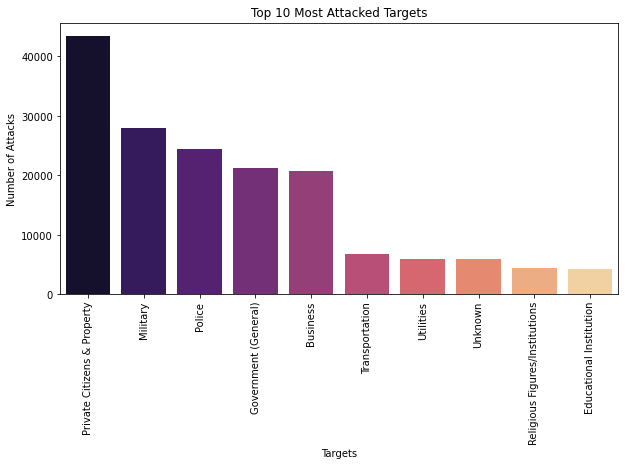

In [29]:
#Most attacked Targets
plt.figure(figsize = (10,5))
sns.barplot(df['Target_Type'].value_counts().head(10).index,df['Target_Type'].value_counts().head(10).values, palette='magma')
plt.title('Top 10 Most Attacked Targets')
plt.xlabel('Targets')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.show()

# Attack vs Location


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


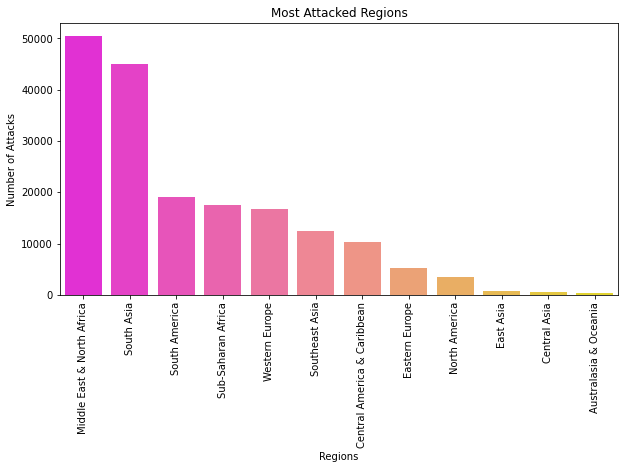

In [30]:
#Regions with most attacks
plt.figure(figsize = (10,5))
sns.barplot(df['Region'].value_counts().index,df['Region'].value_counts().values, palette='spring')
plt.title('Most Attacked Regions')
plt.xlabel('Regions')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.show()



As you can see, Middle East & North African Region is the most affected!


In [31]:
#creating a data frame for Middle East & North Africa
mena = df[df.Region == 'Middle East & North Africa']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


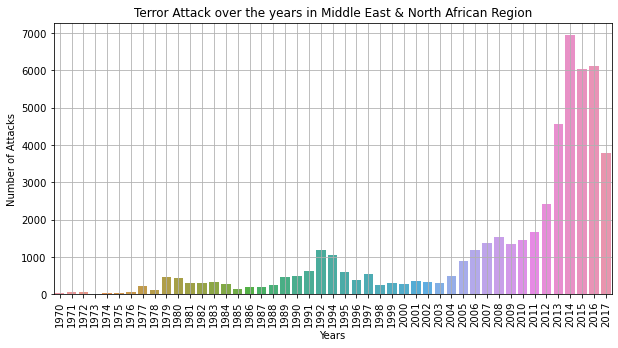

In [32]:
#mena over the years
plt.figure(figsize = (10,5))
sns.barplot(mena['Year'].value_counts().index,mena['Year'].value_counts().values)
plt.title('Terror Attack over the years in Middle East & North African Region')
plt.xlabel('Years')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)

plt.grid()
plt.show()



As you can see, the number of attacks hit a peak during 2014 and luckily it has started to fall in numbers ever since.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


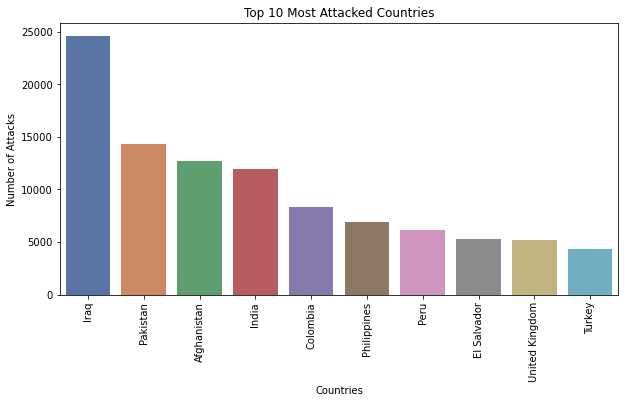

In [33]:
#Countries with most attacks
plt.figure(figsize = (10,5))
sns.barplot(df['Country'].value_counts()[:10].index,df['Country'].value_counts()[:10].values, palette='deep')
plt.title('Top 10 Most Attacked Countries')
plt.xlabel('Countries')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.show()

In [34]:
#creating a data frame for Iraq
df_i = df[df.Country == 'Iraq']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


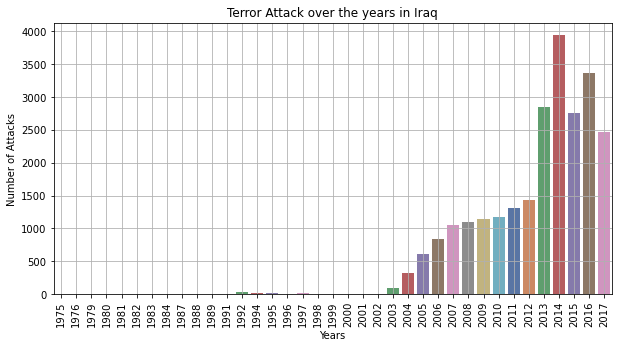

In [35]:
plt.figure(figsize = (10,5))
sns.barplot(df_i['Year'].value_counts().index,df_i['Year'].value_counts().values, palette = 'deep')
plt.title('Terror Attack over the years in Iraq')
plt.xlabel('Years')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.grid()
plt.show()

It looks like terror started gaining traction in Iraq since 2003, steadilty increased till 2012 then spiked the next two years, maxing out during 2014 and have started showing a downward trend. However, even during year 2017, the total number of annual attacks is still as high as 2500. That is almost 7 attacks on average each day.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


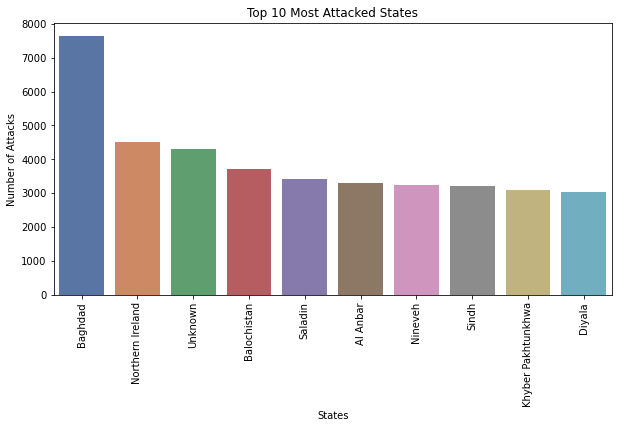

In [36]:
#States with most attacks
plt.figure(figsize = (10,5))
sns.barplot(df['State'].value_counts()[:10].index,df['State'].value_counts()[:10].values, palette='deep')
plt.title('Top 10 Most Attacked States')
plt.xlabel('States')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


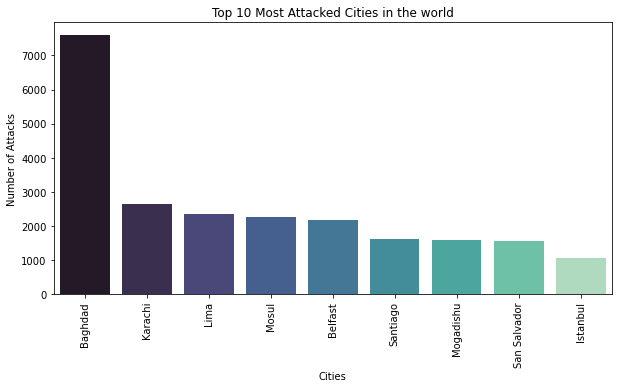

In [37]:
#Cities with most attacks
plt.figure(figsize = (10,5))
sns.barplot(df['City'].value_counts()[1:10].index,df['City'].value_counts()[1:10].values, palette='mako')
plt.title('Top 10 Most Attacked Cities in the world')
plt.xlabel('Cities')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)
#plt.grid()
plt.show()

# Most Used Attack Types


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


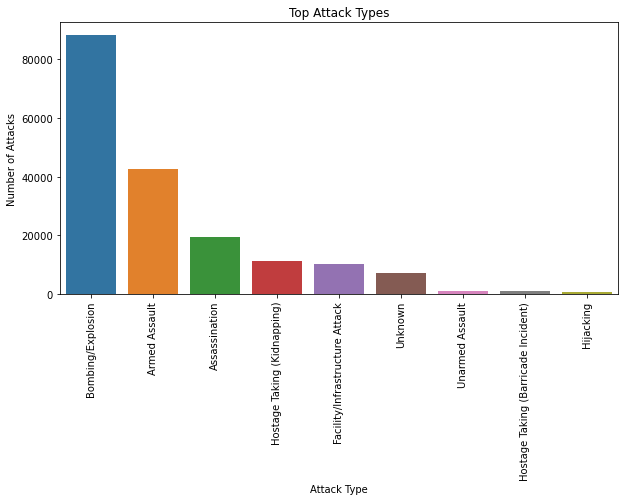

In [38]:
plt.figure(figsize = (10,5))
sns.barplot(df['AttackType'].value_counts().index,df['AttackType'].value_counts().values)
plt.title('Top Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.show()



Bombing/Explosion is the most used terror attack type.


# Weapons vs Attack


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


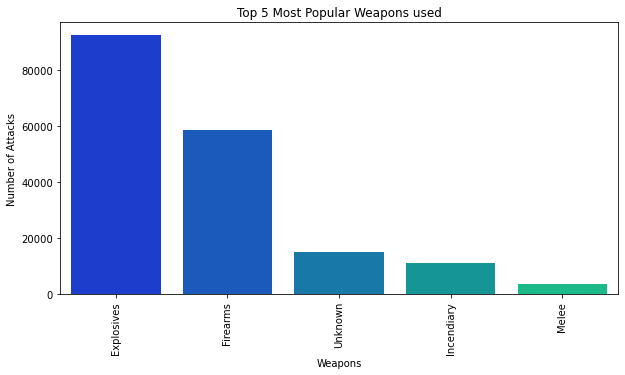

In [39]:
#Top 5 most used weapon types in terror attacks
plt.figure(figsize = (10,5))
sns.barplot(df.Weapon_type.value_counts().head(5).index,df.Weapon_type.value_counts().head(5).values, 
            palette='winter')
plt.title('Top 5 Most Popular Weapons used')
plt.xlabel('Weapons')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.show()



Explosives are the most popular weapon type used in terror attacks


# Terror Attack over the Years

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


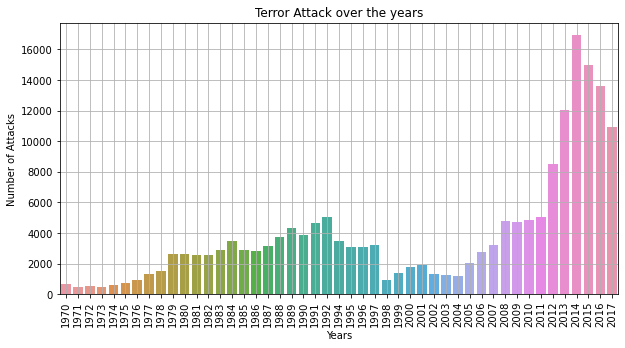

In [40]:
plt.figure(figsize = (10,5))
sns.barplot(df['Year'].value_counts().index,df['Year'].value_counts().values)
plt.title('Terror Attack over the years')
plt.xlabel('Years')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.grid()
plt.show()

Year 2014 had the most number of terror attacks in the last decade!

Approximately 17000 attacks in one year.

This means that around 47 attacks were happening every single day during that year in multiple locations around the world!

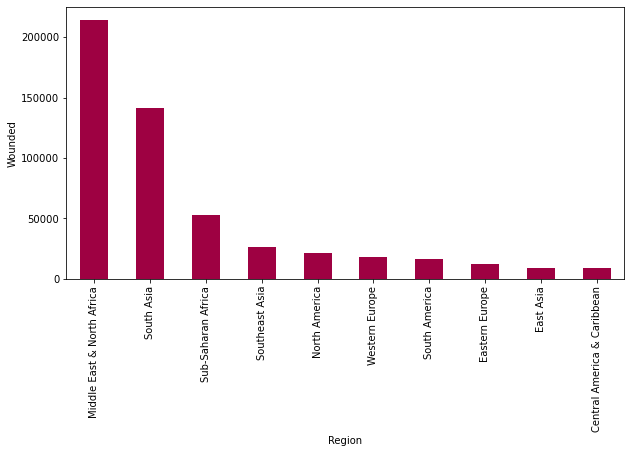

In [41]:
#Wounded vs Region
plt.figure(figsize = (10,5))
df.groupby(['Region'])['Wounded'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                                                     colormap = 'Spectral')

plt.xticks(rotation=90)
plt.ylabel("Wounded")
plt.show()

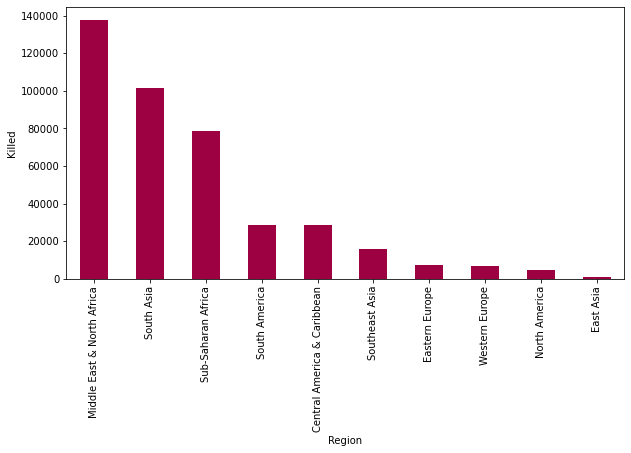

In [42]:
#Killed vs Region
plt.figure(figsize = (10,5))
df.groupby(['Region'])['Killed'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                                                    colormap = 'Spectral')
plt.xticks(rotation=90)
plt.ylabel("Killed")
plt.show()

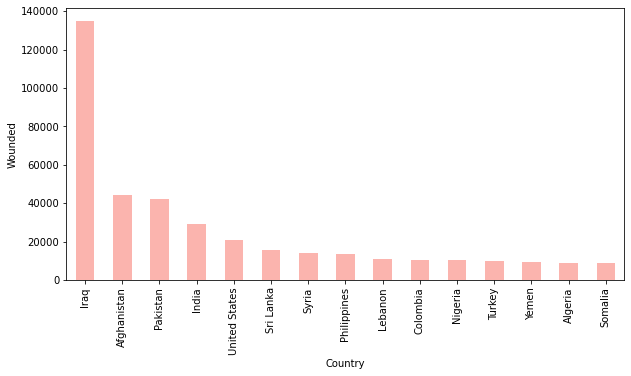

In [46]:
#Wounded vs Country
plt.figure(figsize = (10,5))
df.groupby(['Country'])['Wounded'].sum().sort_values(ascending = False).head(15).plot(kind = 'bar', 
                                                                                      colormap = 'Pastel1')

plt.xticks(rotation=90)
plt.ylabel("Wounded")
plt.show()

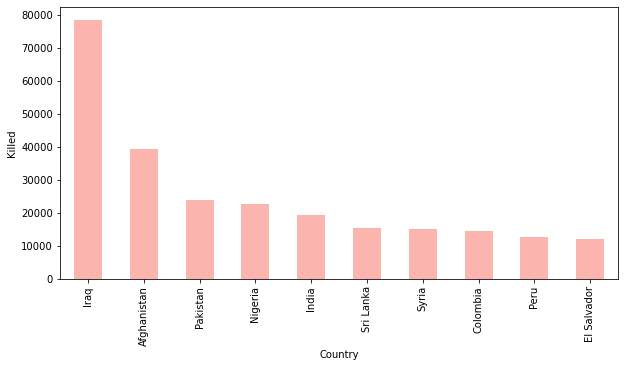

In [47]:
#Killed vs Country
plt.figure(figsize = (10,5))
df.groupby(['Country'])['Killed'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                                                     colormap = 'Pastel1')

plt.xticks(rotation=90)
plt.ylabel("Killed")
plt.show()

# Year 2014

In [48]:
#creating a dataframe for the year 2014
df_2014 = df[df.Year == 2014]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


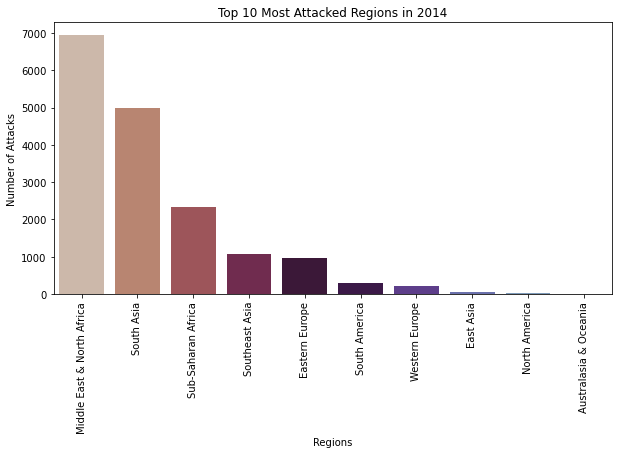

In [49]:
#Top 10 Regions with most attacks in year 2014
plt.figure(figsize = (10,5))
sns.barplot(df_2014['Region'].value_counts()[:10].index,df_2014['Region'].value_counts()[:10].values, 
            palette='twilight_r')
plt.title('Top 10 Most Attacked Regions in 2014')
plt.xlabel('Regions')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


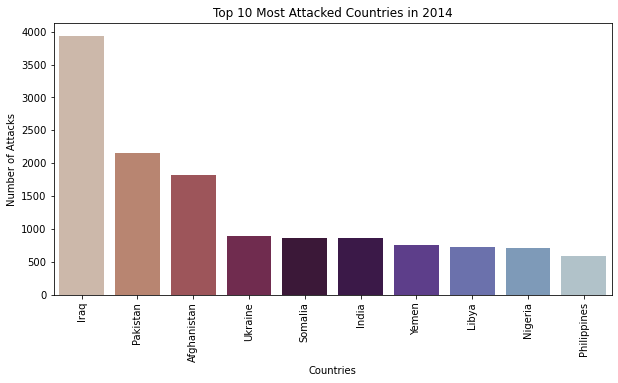

In [50]:
#Top 10 Countries with most attacks in year 2014
plt.figure(figsize = (10,5))
sns.barplot(df_2014['Country'].value_counts()[:10].index,df_2014['Country'].value_counts()[:10].values, 
            palette='twilight_r')
plt.title('Top 10 Most Attacked Countries in 2014')
plt.xlabel('Countries')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


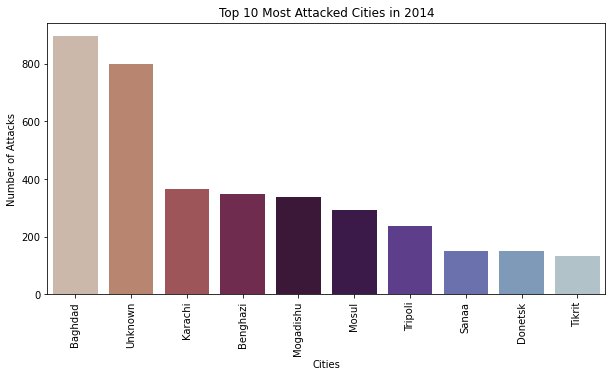

In [51]:
#Top 10 Cities with most attacks in year 2014
plt.figure(figsize = (10,5))
sns.barplot(df_2014['City'].value_counts()[:10].index,df_2014['City'].value_counts()[:10].values, 
            palette='twilight_r')
plt.title('Top 10 Most Attacked Cities in 2014')
plt.xlabel('Cities')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


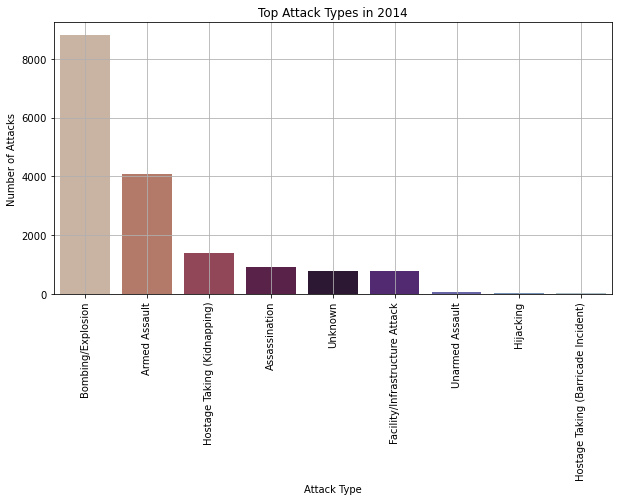

In [52]:
#Most used attack types in 2014
plt.figure(figsize = (10,5))
sns.barplot(df_2014['AttackType'].value_counts()[:20].index,df_2014['AttackType'].value_counts()[:20].values, 
            palette = 'twilight_r' )
plt.title('Top Attack Types in 2014')
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)

plt.grid()
plt.show()

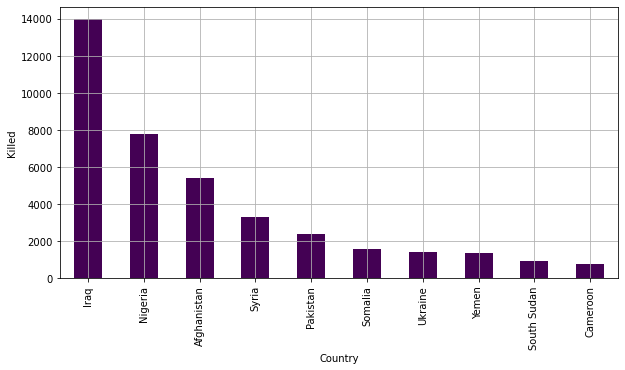

In [53]:
#Killed vs Country in 2014
plt.figure(figsize = (10,5))
df_2014.groupby(['Country'])['Killed'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                                                          colormap = 'viridis')

plt.xticks(rotation=90)
plt.ylabel("Killed")

plt.grid()
plt.show()



In year 2014, Nigeria became the Second Top country when it comes to the kill count.


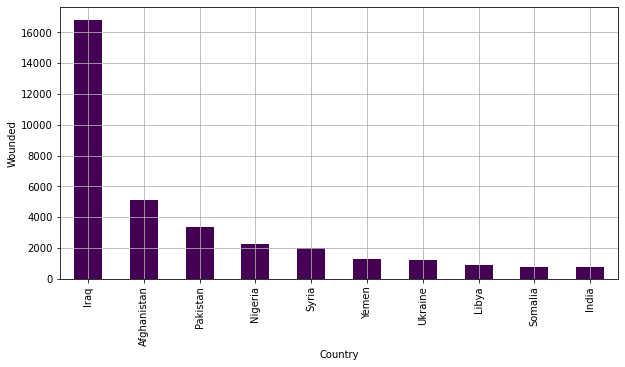

In [54]:
#Wounded vs Country in 2014
plt.figure(figsize = (10,5))
df_2014.groupby(['Country'])['Wounded'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                                                           colormap = 'viridis')

plt.xticks(rotation=90)
plt.ylabel("Wounded")

plt.grid()
plt.show()



Overall, Nigeria ranks 11th when it comes to Number of wounded due to terror attacks. But, in year 2014, it is in the 4th spot.


# Nigeria

In [55]:
#creating a dataframe for Nigeria
nig = df[df.Country == 'Nigeria']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


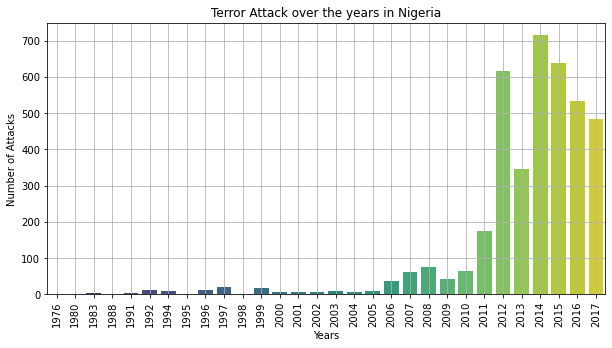

In [56]:
plt.figure(figsize = (10,5))
sns.barplot(nig['Year'].value_counts().index,nig['Year'].value_counts().values, palette = 'viridis')
plt.title('Terror Attack over the years in Nigeria')
plt.xlabel('Years')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.grid()
plt.show()

Over the course of the last decade, there has been a massive spike in the number of terror attacks in Nigeria. While the numbers are coming down, the numbers are still massive when compared to what it was in the previous decade.


Terror Groups vs Attacks


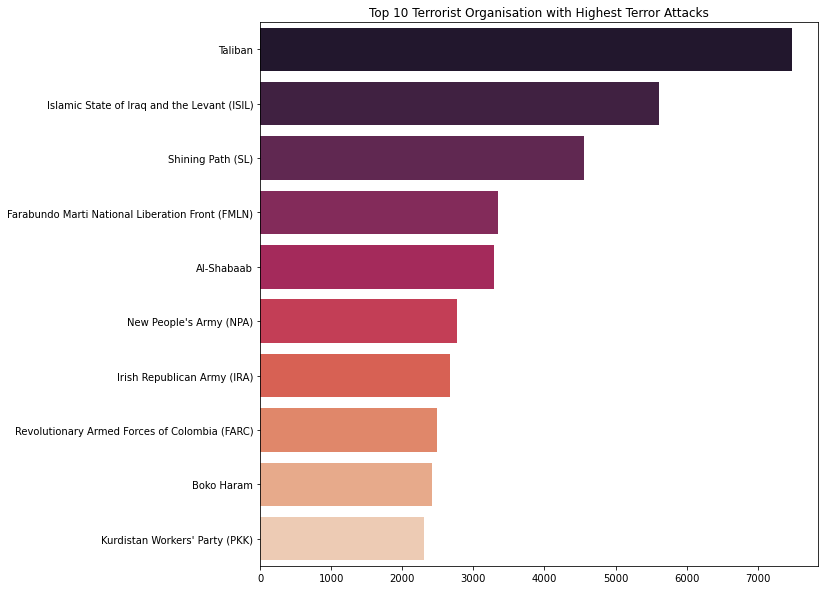

In [57]:


#Terror Groups
plt.figure(figsize = (10,10))
sns.barplot(x = df['Group'].value_counts()[1:11].values,y = df['Group'].value_counts()[1:11].index,palette='rocket')

plt.title('Top 10 Terrorist Organisation with Highest Terror Attacks')
plt.show()





As is evident above, the Taliban is responsible for the most number of attacks in the last 5 decades.


# Taliban

In [58]:
#Creating a DataFrame for Taliban
Tal = df[df.Group == 'Taliban']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


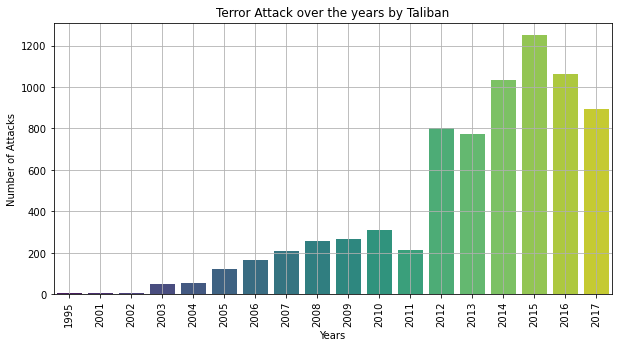

In [59]:
#Terror Attacks by Taliban over the years
plt.figure(figsize = (10,5))
sns.barplot(Tal['Year'].value_counts().index,Tal['Year'].value_counts().values, palette = 'viridis')
plt.title('Terror Attack over the years by Taliban')
plt.xlabel('Years')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.grid()
plt.show()



The attacks by Taliban has peaked during 2015.


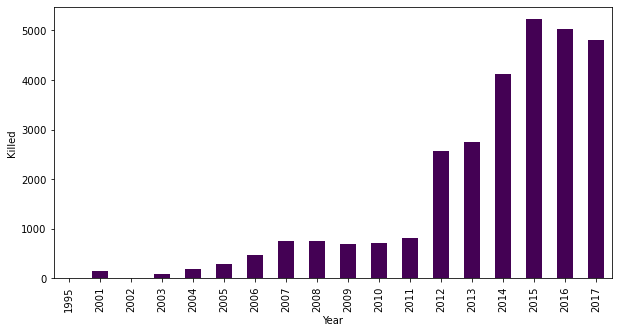

In [60]:
#Killed by Taliban over the years
plt.figure(figsize = (10,5))
Tal.groupby(['Year'])['Killed'].sum().plot(kind = 'bar', colormap = 'viridis')

plt.xticks(rotation=90)
plt.ylabel("Killed")
plt.show()

 The Taliban killed the most number of people (5000) during the year 2015. While there has been a small decline since, they are still responsible for the death of a massive number of people every year!

# Conclusion




1) Private Citizens and Property are the most attacked targets, followed by the Military, Police, Government, Transportation etc.

2) Middle East & North Africa were the top affected region. Most number of people are wounded and/or killed here.

3) The country that was most affected by terror attacks was Iraq. Iraq had the most number of people wounded and/or killed.

4) The State & the City that was most affected by terror attacks was Baghdad.

5) Year 2014 had the most number of terror attacks in the last decade! Approximately 17000 attacks in one year. This means that around 47 attacks were happening every single day during that year in multiple locations around the world!

6) Bombing/Explosion has been consistently the most popular method of attack over the course of the last 5 decades

7) Explosives have been consistently the most popular weapon of choice for terrorists.

8) Taliban has gained much prominence since 2012 and is now responsible for most number of terror attacks.


# Recommendation



1) Since Private Citizens and Property are being targeted consistently and explosives are most favoured weapon type of terror groups, tighter security and surveillance should be provided, especially in densely populated regions

2) More surveillance is required especially in the Middle East & North African Regions.

3) Stricter rules to prevent the movement of explosives into and from countries.
